# Understanding Multivariate Gaussian Distribution with a bivariate example

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

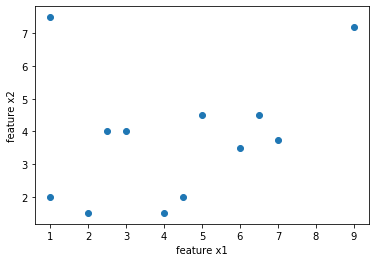

array([[1.  , 2.  ],
       [1.  , 7.5 ],
       [2.  , 1.5 ],
       [2.5 , 4.  ],
       [3.  , 4.  ],
       [4.  , 1.5 ],
       [4.5 , 2.  ],
       [5.  , 4.5 ],
       [6.  , 3.5 ],
       [6.5 , 4.5 ],
       [7.  , 3.75],
       [9.  , 7.2 ]])

In [86]:
# data has two features x1 and x2
x1 = [1,1,2,2.5,3,4,4.5,5,6,6.5,7,9]
x2 = [2,7.5,1.5,4,4,1.5,2,4.5,3.5,4.5,3.75,7.2]
#thus data
data = np.array([list(a) for a in zip(x1,x2)])
#data = [x1,x2]
#scatter plot of data
plt.scatter(x1,x2)
plt.xlabel('feature x1')
plt.ylabel('feature x2')

data

In [87]:
# estimate Gaussian
mu = np.mean(data, axis=0)
cov = np.cov(data.T)
mu,cov

(array([4.29166667, 3.82916667]), array([[6.33901515, 1.46344697],
        [1.46344697, 3.95020833]]))

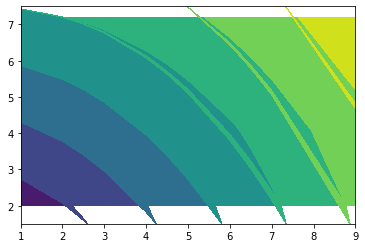

In [88]:
X,Y = np.meshgrid(x1,x2)
pdf = np.sqrt(X**2 + Y**2)

# Plot bivariate distribution
plt.contourf(X,Y,pdf)

In [89]:
# #multivariateGaussian    
pdf = multivariate_normal.pdf(data, mean=mu,cov=cov)
pdf

array([0.01207887, 0.00093465, 0.01403542, 0.0246273 , 0.0282838 ,
       0.01627317, 0.02035093, 0.03085009, 0.02457374, 0.02255797,
       0.01741077, 0.00281174])

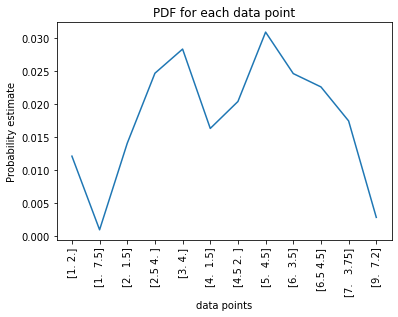

In [90]:
# plotting pDF
plt.plot(pdf)
plt.xticks(range(len(pdf)),[a for a in data],rotation=90)
plt.ylabel('Probability estimate')
plt.xlabel('data points')
plt.title('PDF for each data point')

### if you don't have crossvalidation or test data, an estimate of analomy without supervised learning/training and test modeling would be the data points with smallest probability. Again this 

In [137]:
# data point with least probability and thus is an outlier 
idx = np.ndarray.tolist(pdf).index(min(pdf))
outlier = data[idx]
outlier

array([1. , 7.5])

Text(0.5, 1.0, 'Data plot with outliers')

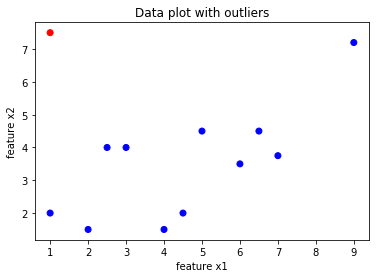

In [138]:
colors = ['r' if i == idx else 'b' for i in range(len(pdf))]
legends = ['Outlier' for i in range(len(colors)) if colors[i]=='r']
plt.scatter(x1,x2,c=colors)
plt.xlabel('feature x1')
plt.ylabel('feature x2')
plt.title('Data plot with outliers')
